# Tensorflow for classification

This notebook will explore the possibility of implementing a deep NN to perform image classification

To do so, we will train a net to identify numerical values of handwriten numbers, by using the famous MNIST dataset. 

This is far from the state-of-the-art. As a matter of fact, the classification of this dataset is considered an outdated problem, as any modern architecture is capable of clearly performing to a high degree of accuracy.

Nonetheless, given its historical importance and the fact that Google Colab provides us with the actual set in the /sample_data directory, we will try it here

## Deep Neural Network - Dense layers for classification

The first attempt will be done using a series of dense layers with non-linear activations. Let's see to what extent we can train a model like this to classify numerical values.

In [1]:
import pathlib
import os

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

Let's check the dataset

In [2]:
print(f'Current directory : {os.getcwd()}\nCurrent directory contents: {os.listdir()}')

Current directory : /content
Current directory contents: ['.config', 'sample_data']


In [3]:
print('Contents of sample data directory')
for i,el in enumerate(os.listdir('./sample_data')):
  print(f'{i} : {el}')

Contents of sample data directory
0 : anscombe.json
1 : README.md
2 : california_housing_test.csv
3 : mnist_train_small.csv
4 : mnist_test.csv
5 : california_housing_train.csv


In [5]:
path_to_file = pathlib.Path('.') / 'sample_data'
assert path_to_file.is_dir()
file_name = 'mnist_train_small.csv'
file_path = path_to_file / file_name
assert file_path.is_file() 

The csv file is organized as follows:

1. Each row is a handwriten digit image. The first element of the row is the label - the true value

2. The images are flatten to be a row single vector

3. The original images shape is 28 x 28

In [9]:
df = pd.read_csv(file_path,names =  [i for i in range(785)])
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


As we are passing the images to a dense layer first (no convolutional layers yet) we are not going to unravel the shapes. However, for the sake o inspecting the actual images used, let's visualize some of them. Notice that they are grey scale images.

In [23]:
df.shape
# 20000 images, a lot

(20000, 785)

In [12]:
import random

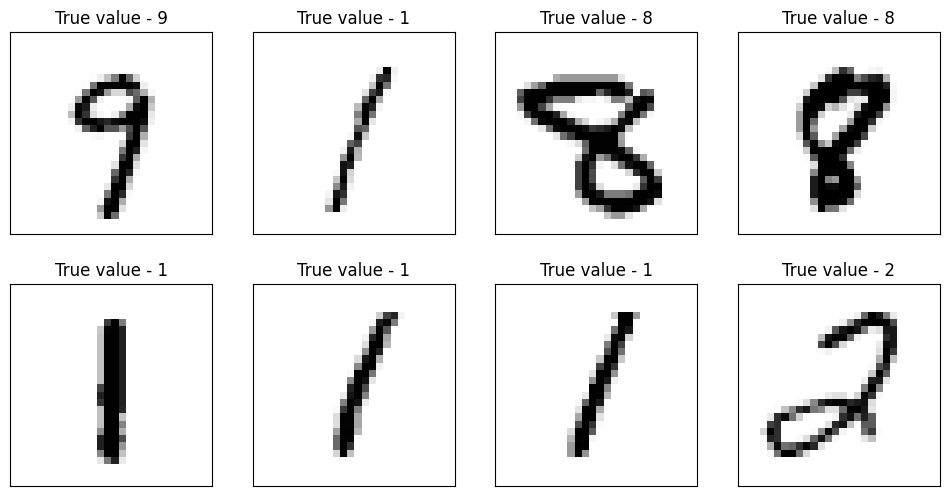

In [27]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (12,6), squeeze=False)
for i, ax in enumerate(axes.flatten()):
  number = random.randint(0, 20000)
  label = df.iloc[number][0]
  data = df.iloc[number][1:].to_numpy().reshape((28,28))
  ax.imshow(data, cmap = 'Greys')
  ax.set_title(f'True value - {label}')
  ax.set_xticks([])
  ax.set_yticks([])


Alright, let's try a NN architecture

In [69]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(512, activation = 'relu', input_shape = (28*28,)),
        tf.keras.layers.Dense(128, activation = 'relu'),
        tf.keras.layers.Dense(10, activation = 'softmax')
    ]
)

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01), metrics = ['accuracy'])

Now, here's the thing ... feeding 20000 images at once to the net... not a great idea. In colab I'm going to end up waiting for a long long time.

We can try to batch the training sample space

In [71]:
dataset = tf.data.Dataset.from_tensor_slices(df.to_numpy().astype(np.float32))
dataset = dataset.map(lambda data : (data[1:] / 255. ,data[0]))
dataset = dataset.shuffle(1000)
dataset = dataset.batch(100).prefetch(1)

In [72]:
for i, el in enumerate(dataset):
  if i == 0:
    print('number -', i)
    print(len(el))
    for k, datael in enumerate(el):
      print('numero', k)
      print(datael.shape)

number - 0
2
numero 0
(100, 784)
numero 1
(100,)


In [73]:
model_h = model.fit(dataset, epochs = 10)

Epoch 1/10
200/200 [==============================] - 4s 15ms/step - loss: 0.3712 - accuracy: 0.8889
Epoch 2/10
200/200 [==============================] - 4s 21ms/step - loss: 0.1564 - accuracy: 0.9516
Epoch 3/10
200/200 [==============================] - 3s 15ms/step - loss: 0.1123 - accuracy: 0.9665
Epoch 4/10
200/200 [==============================] - 3s 15ms/step - loss: 0.0893 - accuracy: 0.9706
Epoch 5/10
200/200 [==============================] - 3s 16ms/step - loss: 0.0879 - accuracy: 0.9747
Epoch 6/10
200/200 [==============================] - 4s 20ms/step - loss: 0.0810 - accuracy: 0.9757
Epoch 7/10
200/200 [==============================] - 3s 15ms/step - loss: 0.0745 - accuracy: 0.9776
Epoch 8/10
200/200 [==============================] - 3s 15ms/step - loss: 0.0622 - accuracy: 0.9817
Epoch 9/10
200/200 [==============================] - 4s 17ms/step - loss: 0.0617 - accuracy: 0.9819
Epoch 10/10
200/200 [==============================] - 3s 15ms/step - loss: 0.0520 - accura

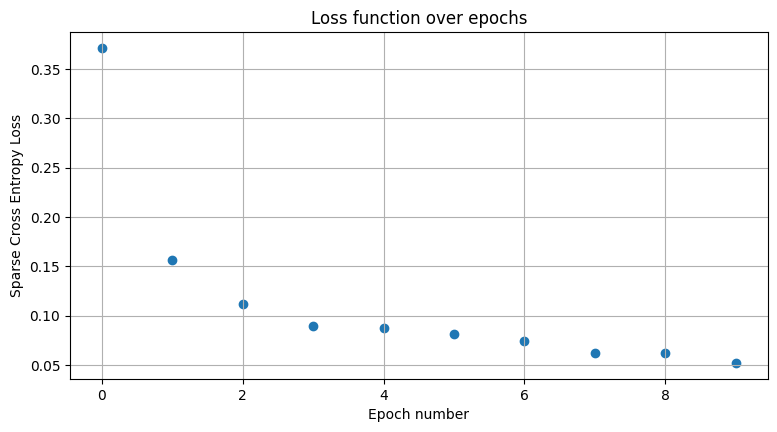

In [75]:
fig = plt.figure(figsize = (9,4.5))
plt.grid(True)
plt.title('Loss function over epochs')
plt.scatter(model_h.epoch, model_h.history['loss'])
plt.xlabel('Epoch number')
plt.ylabel('Sparse Cross Entropy Loss')
plt.show()

Alright, not bad, but with margin of imrpoving the model

Let's try something fun. Let's allow for a variable learning rate in the optimizer, and plot the resulting values as we advance on epochs. At some point, we will observe stability problems, and that is when we will try to stablish the limit

In [85]:
INITIAL_LR = 1e-5

lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch : INITIAL_LR * 10 ** (epoch / 10))

optimizer = tf.keras.optimizers.Adam(learning_rate= INITIAL_LR) # So we have the same initial learning rate as the equation

model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(512, activation = 'relu', input_shape = (28*28,)),
        tf.keras.layers.Dense(128, activation = 'relu'),
        tf.keras.layers.Dense(10, activation = 'softmax')
    ]
)


model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = optimizer,
    metrics = ['accuracy']
)

In [86]:
model_h = model.fit(dataset, epochs = 50, callbacks=[lr_schedule])

Epoch 1/50
200/200 [==============================] - 5s 17ms/step - loss: 2.1302 - accuracy: 0.2928 - lr: 1.0000e-05
Epoch 2/50
200/200 [==============================] - 3s 17ms/step - loss: 1.6623 - accuracy: 0.6679 - lr: 1.2589e-05
Epoch 3/50
200/200 [==============================] - 3s 15ms/step - loss: 1.1321 - accuracy: 0.8026 - lr: 1.5849e-05
Epoch 4/50
200/200 [==============================] - 3s 15ms/step - loss: 0.7531 - accuracy: 0.8536 - lr: 1.9953e-05
Epoch 5/50
200/200 [==============================] - 4s 19ms/step - loss: 0.5429 - accuracy: 0.8806 - lr: 2.5119e-05
Epoch 6/50
200/200 [==============================] - 3s 15ms/step - loss: 0.4277 - accuracy: 0.8975 - lr: 3.1623e-05
Epoch 7/50
200/200 [==============================] - 3s 15ms/step - loss: 0.3572 - accuracy: 0.9078 - lr: 3.9811e-05
Epoch 8/50
200/200 [==============================] - 4s 21ms/step - loss: 0.3083 - accuracy: 0.9171 - lr: 5.0119e-05
Epoch 9/50
200/200 [==============================] - 3s

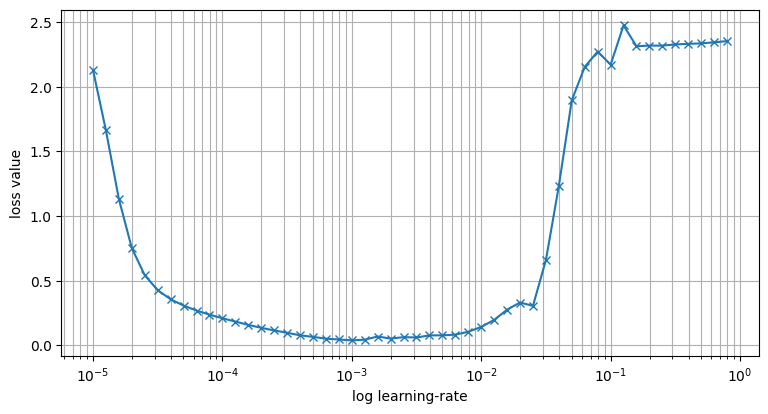

In [104]:
fig = plt.figure(figsize = (9,4.5))
plt.plot(model_h.history['lr'], model_h.history['loss'], marker  = 'x')
plt.xscale('log')
plt.xlabel('log learning-rate')
plt.ylabel('loss value')
plt.grid(True, which = 'both')

Alright, we can begin at $5·10^{-3}$, where is already a bit unstable, but as we progress we will decrease the learning rate with another scheduller and we will see what happens 


In [129]:
INITIAL_LR = 5*1e-3

lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch : INITIAL_LR / (10 ** (epoch // 25)))

optimizer = tf.keras.optimizers.Adam(learning_rate= INITIAL_LR) # So we have the same initial learning rate as the equation

model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(512, activation = 'relu', input_shape = (28*28,)),
        tf.keras.layers.Dense(128, activation = 'relu'),
        tf.keras.layers.Dense(10, activation = 'softmax')
    ]
)


model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = optimizer,
    metrics = ['accuracy']
)

model_h = model.fit(dataset, epochs = 50, callbacks=[lr_schedule])

Epoch 1/50
200/200 [==============================] - 4s 16ms/step - loss: 0.3065 - accuracy: 0.9045 - lr: 0.0050
Epoch 2/50
200/200 [==============================] - 4s 21ms/step - loss: 0.1329 - accuracy: 0.9597 - lr: 0.0050
Epoch 3/50
200/200 [==============================] - 4s 18ms/step - loss: 0.0913 - accuracy: 0.9706 - lr: 0.0050
Epoch 4/50
200/200 [==============================] - 4s 18ms/step - loss: 0.0685 - accuracy: 0.9785 - lr: 0.0050
Epoch 5/50
200/200 [==============================] - 3s 16ms/step - loss: 0.0588 - accuracy: 0.9806 - lr: 0.0050
Epoch 6/50
200/200 [==============================] - 3s 16ms/step - loss: 0.0416 - accuracy: 0.9866 - lr: 0.0050
Epoch 7/50
200/200 [==============================] - 3s 15ms/step - loss: 0.0424 - accuracy: 0.9865 - lr: 0.0050
Epoch 8/50
200/200 [==============================] - 3s 16ms/step - loss: 0.0339 - accuracy: 0.9894 - lr: 0.0050
Epoch 9/50
200/200 [==============================] - 4s 20ms/step - loss: 0.0469 - accu

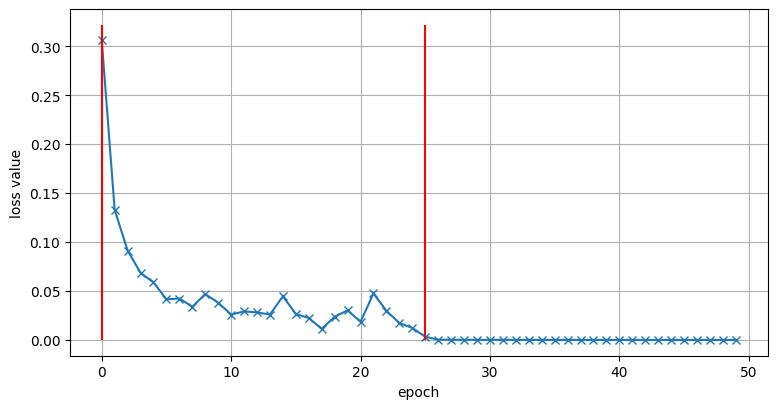

In [137]:
fig = plt.figure(figsize = (9,4.5))
plt.plot(model_h.epoch, model_h.history['loss'], marker  = 'x')
for lr in set(model_h.history['lr']):
  ind =  model_h.history['lr'].index(lr)
  plt.vlines(model_h.epoch[ind],ymin = 0, ymax = max(model_h.history['loss']) + max(model_h.history['loss'])*.05, color = 'r')

plt.xlabel('epoch')
plt.ylabel('loss value')
plt.grid(True, which = 'both')

So, did the change in lr improved the training towards a lower value of loss, or was the epoch number the main culprit?

In [138]:
INITIAL_LR = 1*1e-2

lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch : INITIAL_LR / (10 ** (epoch // 10)))

optimizer = tf.keras.optimizers.Adam(learning_rate= INITIAL_LR) # So we have the same initial learning rate as the equation

model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(512, activation = 'relu', input_shape = (28*28,)),
        tf.keras.layers.Dense(128, activation = 'relu'),
        tf.keras.layers.Dense(10, activation = 'softmax')
    ]
)


model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = optimizer,
    metrics = ['accuracy']
)

model_h = model.fit(dataset, epochs = 50, callbacks=[lr_schedule])

Epoch 1/50
200/200 [==============================] - 4s 15ms/step - loss: 0.3526 - accuracy: 0.8917 - lr: 0.0100
Epoch 2/50
200/200 [==============================] - 4s 19ms/step - loss: 0.1544 - accuracy: 0.9544 - lr: 0.0100
Epoch 3/50
200/200 [==============================] - 4s 19ms/step - loss: 0.1185 - accuracy: 0.9627 - lr: 0.0100
Epoch 4/50
200/200 [==============================] - 3s 15ms/step - loss: 0.0953 - accuracy: 0.9707 - lr: 0.0100
Epoch 5/50
200/200 [==============================] - 3s 17ms/step - loss: 0.0860 - accuracy: 0.9735 - lr: 0.0100
Epoch 6/50
200/200 [==============================] - 3s 16ms/step - loss: 0.0809 - accuracy: 0.9760 - lr: 0.0100
Epoch 7/50
200/200 [==============================] - 3s 15ms/step - loss: 0.0788 - accuracy: 0.9768 - lr: 0.0100
Epoch 8/50
200/200 [==============================] - 4s 22ms/step - loss: 0.0747 - accuracy: 0.9778 - lr: 0.0100
Epoch 9/50
200/200 [==============================] - 5s 23ms/step - loss: 0.0810 - accu

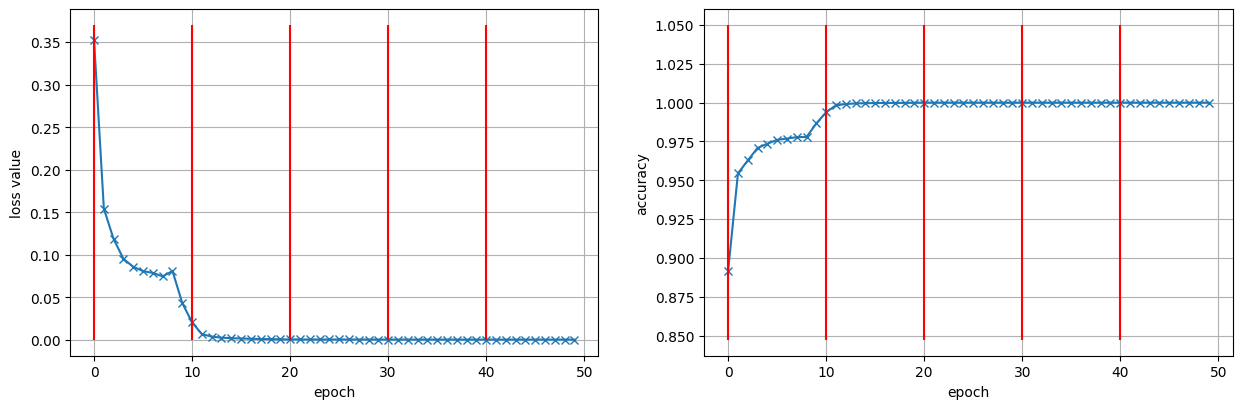

In [143]:
fig, axis  = plt.subplots(nrows = 1, ncols = 2, figsize = (15,4.5), squeeze = False)
axis[0,0].plot(model_h.epoch, model_h.history['loss'], marker  = 'x')
for lr in set(model_h.history['lr']):
  ind =  model_h.history['lr'].index(lr)
  axis[0,0].vlines(model_h.epoch[ind],ymin = 0, ymax = max(model_h.history['loss']) + max(model_h.history['loss'])*.05, color = 'r')

axis[0,0].set_xlabel('epoch')
axis[0,0].set_ylabel('loss value')
axis[0,0].grid(True, which = 'both')


axis[0,1].plot(model_h.epoch, model_h.history['accuracy'], marker  = 'x')
for lr in set(model_h.history['lr']):
  ind =  model_h.history['lr'].index(lr)
  axis[0,1].vlines(model_h.epoch[ind],ymin = min(model_h.history['accuracy']) - min(model_h.history['accuracy'])*.05, ymax = max(model_h.history['accuracy']) + max(model_h.history['accuracy'])*.05, color = 'r')

axis[0,1].set_xlabel('epoch')
axis[0,1].set_ylabel('accuracy')
axis[0,1].grid(True)


We are probably overfitting the model during training.

Let's include a testing set, and get the testing accuracy along with the training

In [146]:
test_path = path_to_file / 'mnist_test.csv'
df2 = pd.read_csv(test_path, names = [i for i in range(785)])
df2.head(5)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [151]:
test_ds = tf.data.Dataset.from_tensor_slices(df2.to_numpy().astype(np.float32))

test_ds = test_ds.map(lambda data : (data[1:] / 255. , data[0]))
test_ds = test_ds.shuffle(1000)
test_ds = test_ds.batch(100).prefetch(1)

In [152]:
INITIAL_LR = 1*1e-2

lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch : INITIAL_LR / (10 ** (epoch // 10)))

optimizer = tf.keras.optimizers.Adam(learning_rate= INITIAL_LR) # So we have the same initial learning rate as the equation

model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(512, activation = 'relu', input_shape = (28*28,)),
        tf.keras.layers.Dense(128, activation = 'relu'),
        tf.keras.layers.Dense(10, activation = 'softmax')
    ]
)


model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = optimizer,
    metrics = ['accuracy']
)

model_h = model.fit(dataset, epochs = 50, callbacks=[lr_schedule], validation_data=test_ds)

Epoch 1/50
200/200 [==============================] - 5s 23ms/step - loss: 0.3566 - accuracy: 0.8947 - val_loss: 0.1782 - val_accuracy: 0.9482 - lr: 0.0100
Epoch 2/50
200/200 [==============================] - 5s 27ms/step - loss: 0.1551 - accuracy: 0.9528 - val_loss: 0.1598 - val_accuracy: 0.9517 - lr: 0.0100
Epoch 3/50
200/200 [==============================] - 4s 22ms/step - loss: 0.1117 - accuracy: 0.9663 - val_loss: 0.1685 - val_accuracy: 0.9534 - lr: 0.0100
Epoch 4/50
200/200 [==============================] - 4s 22ms/step - loss: 0.1015 - accuracy: 0.9688 - val_loss: 0.1918 - val_accuracy: 0.9473 - lr: 0.0100
Epoch 5/50
200/200 [==============================] - 4s 19ms/step - loss: 0.0843 - accuracy: 0.9750 - val_loss: 0.1615 - val_accuracy: 0.9600 - lr: 0.0100
Epoch 6/50
200/200 [==============================] - 5s 25ms/step - loss: 0.0845 - accuracy: 0.9738 - val_loss: 0.1896 - val_accuracy: 0.9564 - lr: 0.0100
Epoch 7/50
200/200 [==============================] - 4s 20ms/st

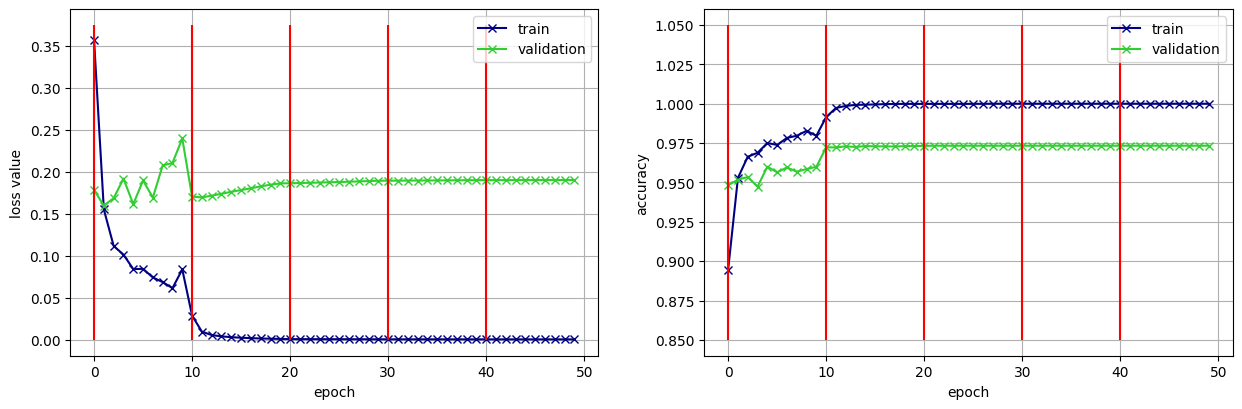

In [155]:
fig, axis  = plt.subplots(nrows = 1, ncols = 2, figsize = (15,4.5), squeeze = False)
axis[0,0].plot(model_h.epoch, model_h.history['loss'], marker  = 'x', c = 'navy', label = 'train')
axis[0,0].plot(model_h.epoch, model_h.history['val_loss'], marker  = 'x', c = 'limegreen', label = 'validation')
for lr in set(model_h.history['lr']):
  ind =  model_h.history['lr'].index(lr)
  axis[0,0].vlines(model_h.epoch[ind],ymin = 0, ymax = max(model_h.history['loss']) + max(model_h.history['loss'])*.05, color = 'r')

axis[0,0].set_xlabel('epoch')
axis[0,0].set_ylabel('loss value')
axis[0,0].grid(True, which = 'both')
axis[0,0].legend()

axis[0,1].plot(model_h.epoch, model_h.history['accuracy'], marker  = 'x', c = 'navy', label = 'train')
axis[0,1].plot(model_h.epoch, model_h.history['val_accuracy'], marker  = 'x', c = 'limegreen', label = 'validation')
for lr in set(model_h.history['lr']):
  ind =  model_h.history['lr'].index(lr)
  axis[0,1].vlines(model_h.epoch[ind],ymin = min(model_h.history['accuracy']) - min(model_h.history['accuracy'])*.05, ymax = max(model_h.history['accuracy']) + max(model_h.history['accuracy'])*.05, color = 'r')

axis[0,1].set_xlabel('epoch')
axis[0,1].set_ylabel('accuracy')
axis[0,1].grid(True)
axis[0,1].legend()

Sooo, yes, we are overfitting. Moreover, up until the change in rate, the validation loss is quite erratic, then it increases slowly, to finally stabilize.

The accuracy behaves somewhat better, but clearly stagnates after the first change in the accuracy.